In [1]:
# Import packages
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from wordcloud import WordCloud
from datetime import datetime  
from scipy import stats 
from IPython.display import display_html, clear_output;
from gc import collect; 
from warnings import filterwarnings; 
filterwarnings("ignore");

In [2]:
# Load data
df = pd.read_csv("smartphones.csv")    
df.head()

,brand_name,model,price,avg_rating,5G_or_not,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging_available,...,internal_memory,screen_size,refresh_rate,num_rear_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,resolution_height,resolution_width
0,apple,Apple iPhone 11,38999,7.3,0,bionic,6.0,2.65,3110.0,0,...,64,6.1,60,2,ios,12.0,12.0,0,1792,828
1,apple,Apple iPhone 11 (128GB),46999,7.5,0,bionic,6.0,2.65,3110.0,0,...,128,6.1,60,2,ios,12.0,12.0,0,1792,828
2,apple,Apple iPhone 11 Pro Max,109900,7.7,0,bionic,6.0,2.65,3500.0,1,...,64,6.5,60,3,ios,12.0,12.0,0,2688,1242
3,apple,Apple iPhone 12,51999,7.4,1,bionic,6.0,3.10,NaN,0,...,64,6.1,60,2,ios,12.0,12.0,0,2532,1170
4,apple,Apple iPhone 12 (128GB),55999,7.5,1,bionic,6.0,3.10,NaN,0,...,128,6.1,60,2,ios,12.0,12.0,0,2532,1170


---
### Exploring The Dataset

In [3]:
# Information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand_name                 980 non-null    object 
 1   model                      980 non-null    object 
 2   price                      980 non-null    int64  
 3   avg_rating                 879 non-null    float64
 4   5G_or_not                  980 non-null    int64  
 5   processor_brand            960 non-null    object 
 6   num_cores                  974 non-null    float64
 7   processor_speed            938 non-null    float64
 8   battery_capacity           969 non-null    float64
 9   fast_charging_available    980 non-null    int64  
 10  fast_charging              769 non-null    float64
 11  ram_capacity               980 non-null    int64  
 12  internal_memory            980 non-null    int64  
 13  screen_size                980 non-null    float64

In [4]:
# Check duplicates
df.duplicated().sum()

0

In [5]:
# Check the null values in the dataset
df.isna().sum()

brand_name                     0
model                          0
price                          0
avg_rating                   101
5G_or_not                      0
processor_brand               20
num_cores                      6
processor_speed               42
battery_capacity              11
fast_charging_available        0
fast_charging                211
ram_capacity                   0
internal_memory                0
screen_size                    0
refresh_rate                   0
num_rear_cameras               0
os                            14
primary_camera_rear            0
primary_camera_front           5
extended_memory_available      0
resolution_height              0
resolution_width               0
dtype: int64

---
### Data Processing 

In [6]:
# List of columns with missing values
columns_with_missing = ["avg_rating", "processor_brand", "num_cores", "processor_speed", "battery_capacity", "fast_charging", "os",
                       "primary_camera_front"]

df[columns_with_missing].head()

,avg_rating,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging,os,primary_camera_front
0,7.3,bionic,6.0,2.65,3110.0,NaN,ios,12.0
1,7.5,bionic,6.0,2.65,3110.0,NaN,ios,12.0
2,7.7,bionic,6.0,2.65,3500.0,18.0,ios,12.0
3,7.4,bionic,6.0,3.10,NaN,NaN,ios,12.0
4,7.5,bionic,6.0,3.10,NaN,NaN,ios,12.0


In [7]:
# Filter dataframe to include only columns with missing values
df_missing = df[columns_with_missing]

# Description of the dataframe for columns with missing values
df_missing.describe().style.background_gradient(cmap = "Blues")

,avg_rating,num_cores,processor_speed,battery_capacity,fast_charging,primary_camera_front
count,879.000000,974.000000,938.000000,969.000000,769.000000,975.000000
mean,7.825825,7.772074,2.427217,4817.748194,46.126138,16.589744
std,0.740285,0.836845,0.464090,1009.540054,34.277870,10.876944
min,6.000000,4.000000,1.200000,1821.000000,10.000000,0.000000
25%,7.400000,8.000000,2.050000,4500.000000,18.000000,8.000000
50%,8.000000,8.000000,2.300000,5000.000000,33.000000,16.000000
75%,8.400000,8.000000,2.840000,5000.000000,66.000000,16.000000
max,8.900000,8.000000,3.220000,22000.000000,240.000000,60.000000


In [8]:
# Fill missing values in the "rating" column with its mean
df["avg_rating"].fillna(df["avg_rating"].mean(), inplace = True)

In [9]:
# Fill missing values in the "processor_speed" column with its mean
df["processor_speed"].fillna(df["processor_speed"].mean(), inplace = True)

In [10]:
# Fill missing values in the "battery_capacity" column with the calculated mean
df["battery_capacity"].fillna(df["battery_capacity"].mean(), inplace=True)

In [11]:
# Generate random values to fill missing values in the "fast_charging" column
fast_charging_values = [20, 72]

random_values = np.random.choice(fast_charging_values, size = df["fast_charging"].isnull().sum(), replace = True)

# Replace missing values in the "fast_charging" column with the generated random values
df.loc[df["fast_charging"].isnull(), "fast_charging"] = random_values

In [12]:
# Drop rows with missing values from the dataframe
df.dropna(inplace = True)
df.isna().sum()

brand_name                   0
model                        0
price                        0
avg_rating                   0
5G_or_not                    0
processor_brand              0
num_cores                    0
processor_speed              0
battery_capacity             0
fast_charging_available      0
fast_charging                0
ram_capacity                 0
internal_memory              0
screen_size                  0
refresh_rate                 0
num_rear_cameras             0
os                           0
primary_camera_rear          0
primary_camera_front         0
extended_memory_available    0
resolution_height            0
resolution_width             0
dtype: int64

In [13]:
df.describe().T.style.background_gradient(cmap = "Blues", axis = 1)

,count,mean,std,min,25%,50%,75%,max
price,937.000000,31351.595518,38409.656638,3499.000000,12999.000000,19990.000000,34999.000000,650000.000000
avg_rating,937.000000,7.838660,0.689690,6.000000,7.500000,7.900000,8.400000,8.900000
5G_or_not,937.000000,0.564568,0.496078,0.000000,0.000000,1.000000,1.000000,1.000000
num_cores,937.000000,7.797225,0.777263,4.000000,8.000000,8.000000,8.000000,8.000000
processor_speed,937.000000,2.430517,0.447568,1.200000,2.050000,2.400000,2.840000,3.220000
battery_capacity,937.000000,4828.365509,993.006091,1821.000000,4500.000000,5000.000000,5000.000000,22000.000000
fast_charging_available,937.000000,0.860192,0.346973,0.000000,1.000000,1.000000,1.000000,1.000000
fast_charging,937.000000,46.160085,32.952796,10.000000,20.000000,33.000000,67.000000,240.000000
ram_capacity,937.000000,6.561366,2.706577,1.000000,4.000000,6.000000,8.000000,18.000000
internal_memory,937.000000,140.337247,105.050768,8.000000,64.000000,128.000000,128.000000,1024.000000


In [14]:
df.describe().T.style.background_gradient(cmap = "Blues", axis = 1)

,count,mean,std,min,25%,50%,75%,max
price,937.000000,31351.595518,38409.656638,3499.000000,12999.000000,19990.000000,34999.000000,650000.000000
avg_rating,937.000000,7.838660,0.689690,6.000000,7.500000,7.900000,8.400000,8.900000
5G_or_not,937.000000,0.564568,0.496078,0.000000,0.000000,1.000000,1.000000,1.000000
num_cores,937.000000,7.797225,0.777263,4.000000,8.000000,8.000000,8.000000,8.000000
processor_speed,937.000000,2.430517,0.447568,1.200000,2.050000,2.400000,2.840000,3.220000
battery_capacity,937.000000,4828.365509,993.006091,1821.000000,4500.000000,5000.000000,5000.000000,22000.000000
fast_charging_available,937.000000,0.860192,0.346973,0.000000,1.000000,1.000000,1.000000,1.000000
fast_charging,937.000000,46.160085,32.952796,10.000000,20.000000,33.000000,67.000000,240.000000
ram_capacity,937.000000,6.561366,2.706577,1.000000,4.000000,6.000000,8.000000,18.000000
internal_memory,937.000000,140.337247,105.050768,8.000000,64.000000,128.000000,128.000000,1024.000000


---
### Exploratory Data Analysis

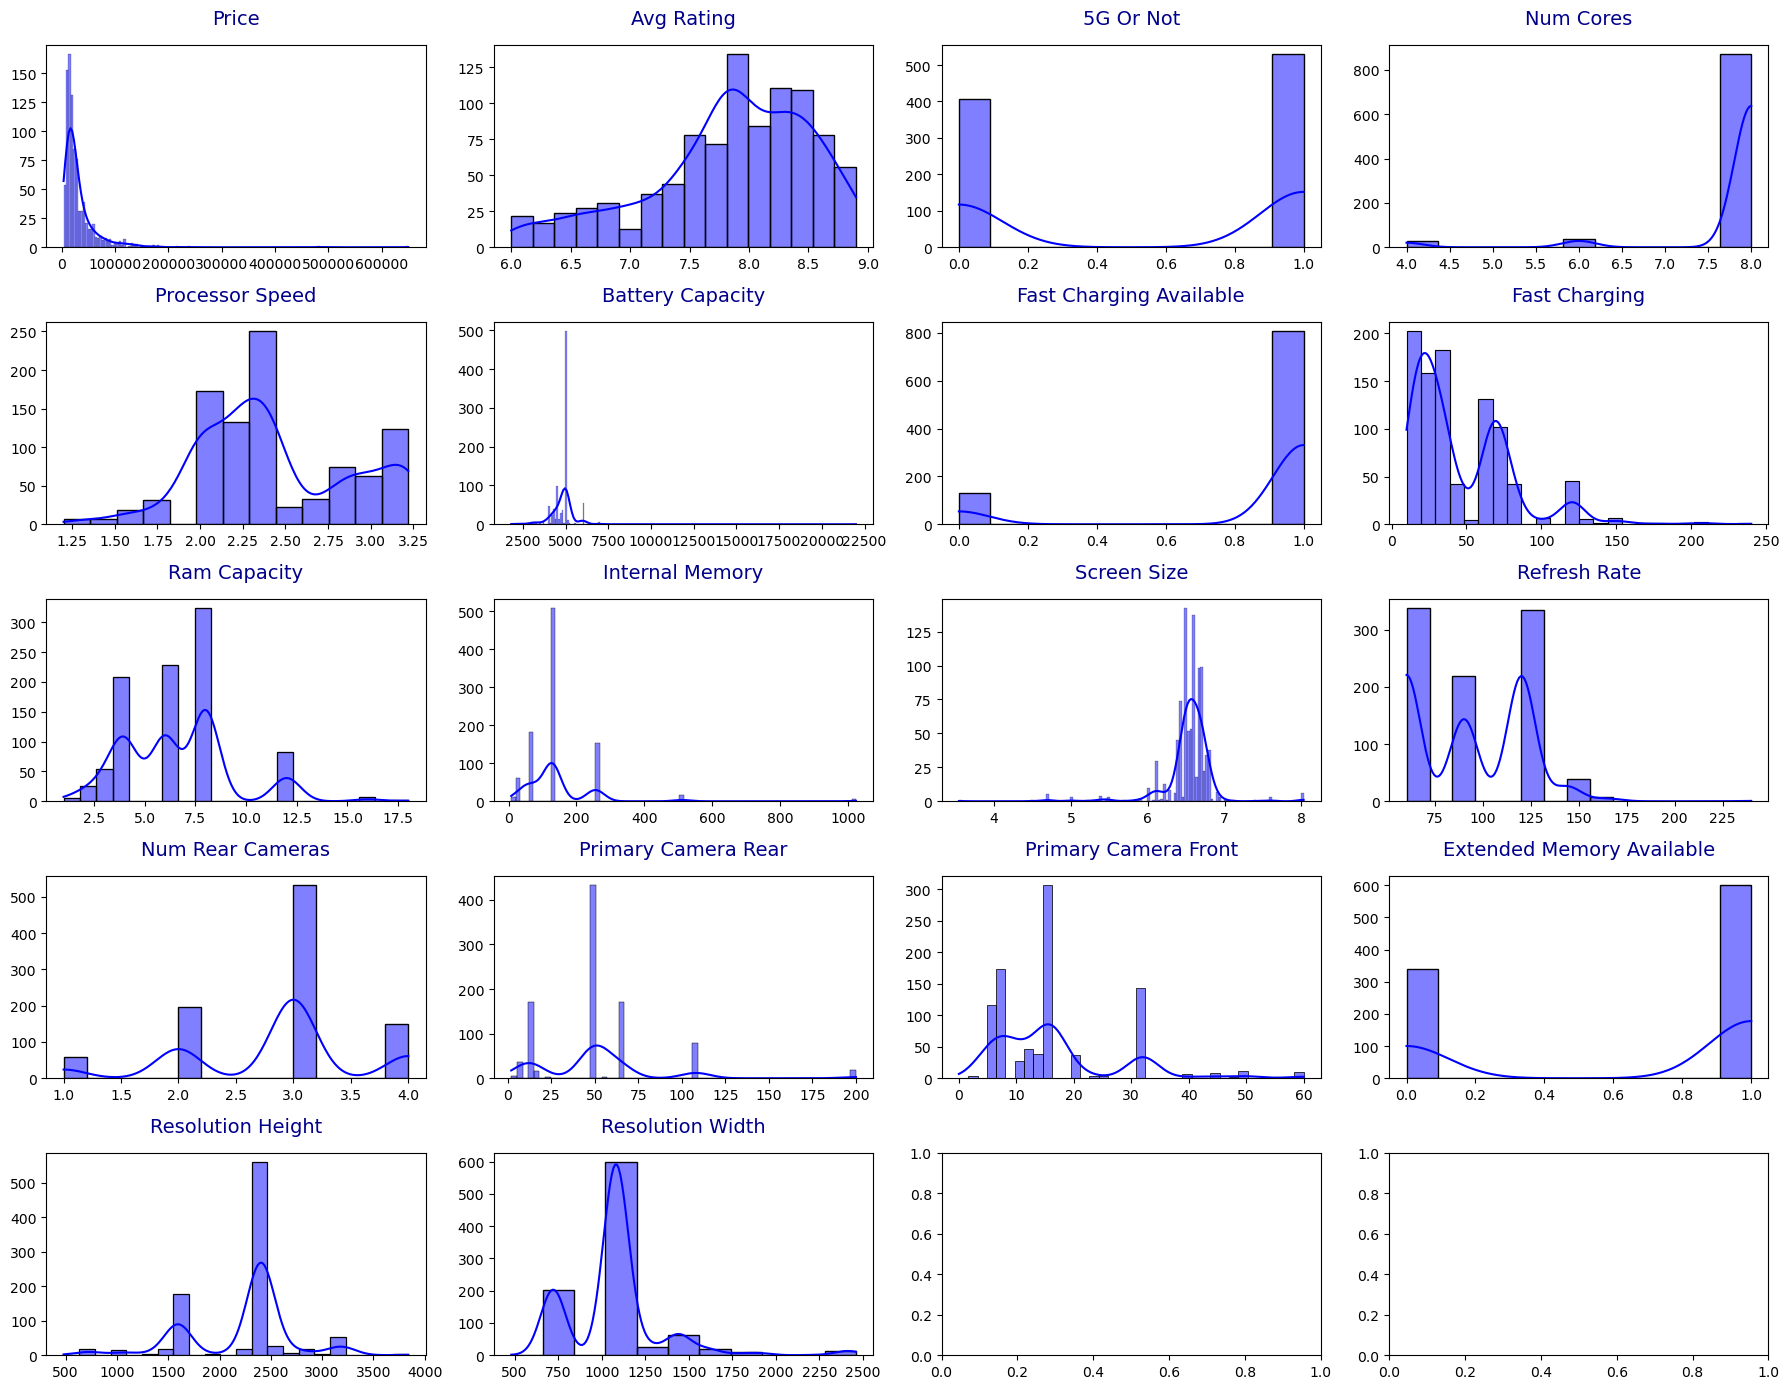

In [15]:
# Filter columns to include only integer and float columns
numeric_cols = df.select_dtypes(include = ["int64", "float64"]).columns

# Create figure and axes
fig, axs = plt.subplots(5, 4, figsize = (18, 14), facecolor = "white")
fig.patch.set_alpha(0.2)

# Flatten axes for easier iteration
axs = axs.flatten()

# Loop through each numeric column in your dataset
for i, col in enumerate(numeric_cols):
    sns.histplot(data = df, x = col, color = "blue", kde = True, ax = axs[i])
    axs[i].grid(False)
    
    # Set plot title
    title = col.replace("_", " ").title()  # Convert column name to title format
    axs[i].set_title(title, color = "darkblue", pad = 15, fontsize = "14")
    axs[i].set_facecolor("white")
    
    # Set empty x-label and y-label
    axs[i].set_xlabel("")
    axs[i].set_ylabel("")

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

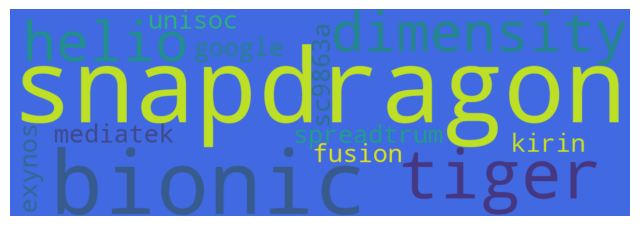

In [16]:
# Generate a string of all processor brands concatenated
processor_brands_text = " ".join(df["processor_brand"].dropna())
text_to_lst = set(processor_brands_text.split())
text_to_lst = " ".join(text_to_lst)

# Create the word cloud object with a gray background
wordcloud = WordCloud(width = 1200, height = 400, background_color = "royalblue").generate(text_to_lst)

# Create a centered figure
plt.figure(figsize = (8, 4), facecolor = "white")
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

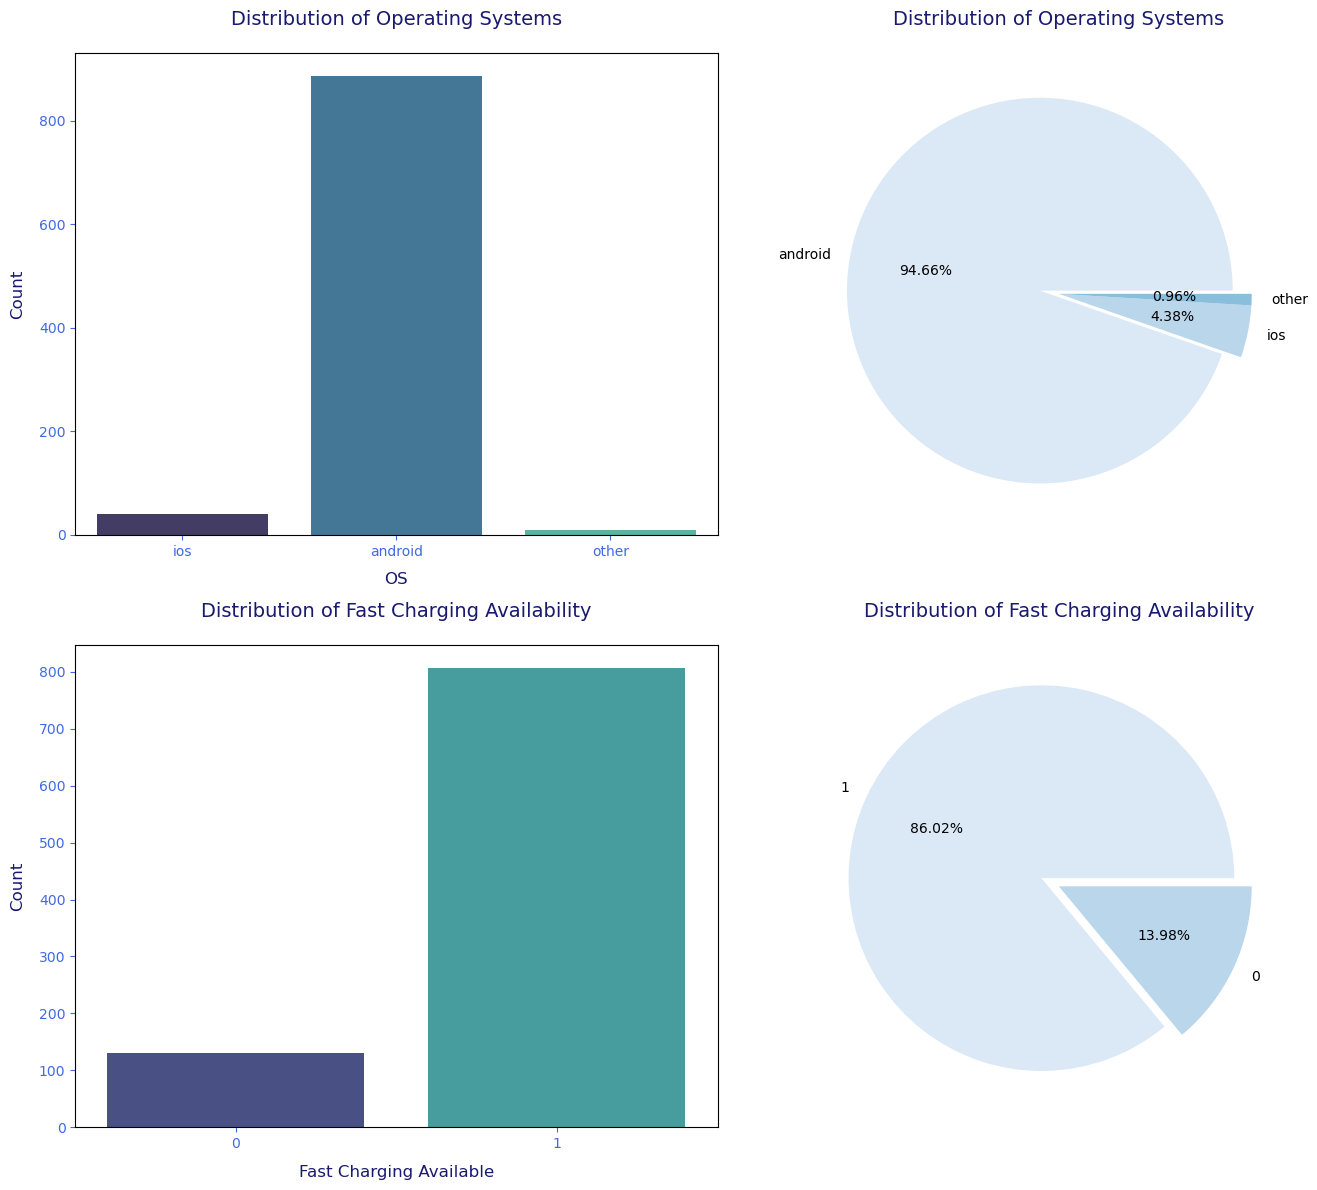

In [17]:
# Calculate the counts of each operating system
os_counts = df["os"].value_counts()

# Calculate the counts of each fast charging availability
fast_charging_counts = df["fast_charging_available"].value_counts()

# Plotting
fig, axes = plt.subplots(2, 2, figsize = (14, 12), facecolor = "white")
fig.patch.set_alpha(0.2)

# Countplot for the distribution of OS
sns.countplot(data = df, x = "os", ax = axes[0, 0], palette = "mako")
axes[0, 0].set_title("Distribution of Operating Systems", pad = 20, fontsize = 14, color = "midnightblue")
axes[0, 0].set_xlabel("OS", labelpad = 10, fontsize = 12, color = "midnightblue")
axes[0, 0].set_ylabel("Count", labelpad = 10, fontsize = 12, color = "midnightblue") 
axes[0, 0].tick_params(labelsize = 10, colors = "royalblue")
axes[0, 0].grid(False)

# Pie chart for the distribution of OS
axes[0, 1].set_title("Distribution of Operating Systems", pad = 20, fontsize = 14, color = "midnightblue")
axes[0, 1].pie(os_counts.values, labels = os_counts.index, explode = (0.1, 0, 0), 
               autopct = "%1.2f%%", colors = sns.color_palette("Blues"))

# Countplot for the distribution of fast charging availability
sns.countplot(data = df, x = "fast_charging_available", ax = axes[1, 0], palette = "mako")
axes[1, 0].set_title("Distribution of Fast Charging Availability", pad = 20, fontsize = 14, color = "midnightblue")
axes[1, 0].set_xlabel("Fast Charging Available", labelpad = 10, fontsize = 12, color = "midnightblue")
axes[1, 0].set_ylabel("Count", labelpad = 10, fontsize = 12, color = "midnightblue")
axes[1, 0].tick_params(labelsize = 10, colors = "royalblue")
axes[1, 0].grid(False)

# Pie chart for the distribution of fast charging availability
axes[1, 1].set_title("Distribution of Fast Charging Availability", pad = 20, fontsize = 14, color = "midnightblue")
axes[1, 1].pie(fast_charging_counts.values, labels = fast_charging_counts.index, explode = (0.1, 0),
               autopct = "%1.2f%%", colors = sns.color_palette("Blues"))

# Adjust layout
plt.tight_layout()
plt.show()

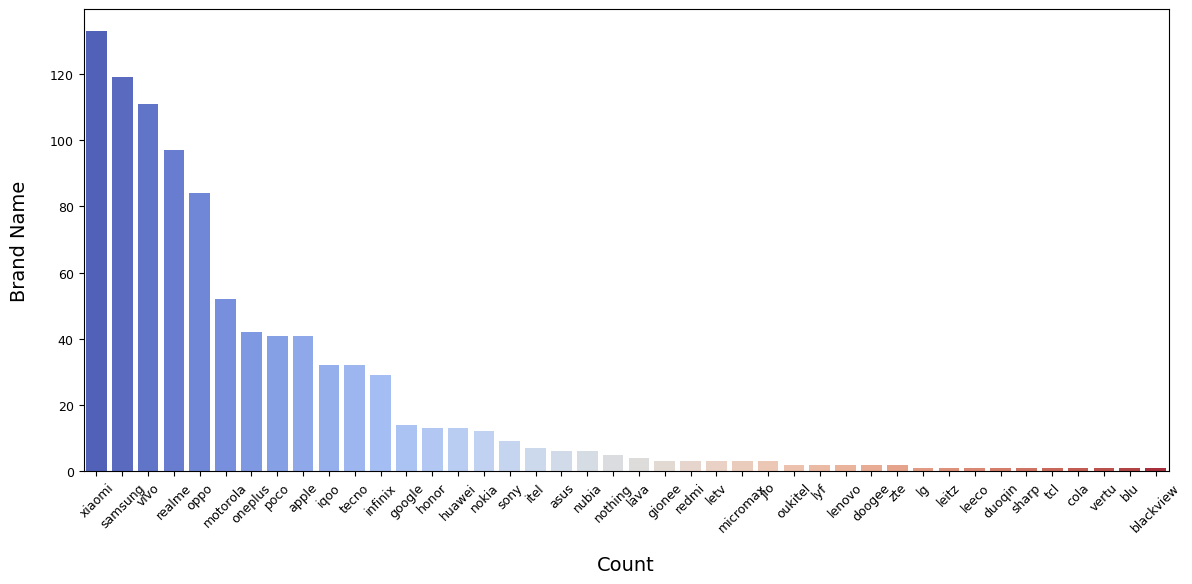

In [18]:
# Calculate the count of each brand name
brand_name_counts = df["brand_name"].value_counts()

# Get the index of brand names sorted by count in ascending order
sorted_brand_names = brand_name_counts.index

# Set the background color
sns.set_style(rc = {"axes.facecolor": "white"})

# Plotting
plt.figure(figsize = (14, 6), facecolor = "white")  
sns.countplot(data = df, x = "brand_name", order = sorted_brand_names, palette = "coolwarm")
plt.xlabel("Count", labelpad = 15, fontsize = 14)
plt.ylabel("Brand Name", labelpad = 15, fontsize = 14)
plt.xticks(rotation = 45, fontsize = 9)
plt.yticks(fontsize = 9)
plt.grid(False)
plt.show()

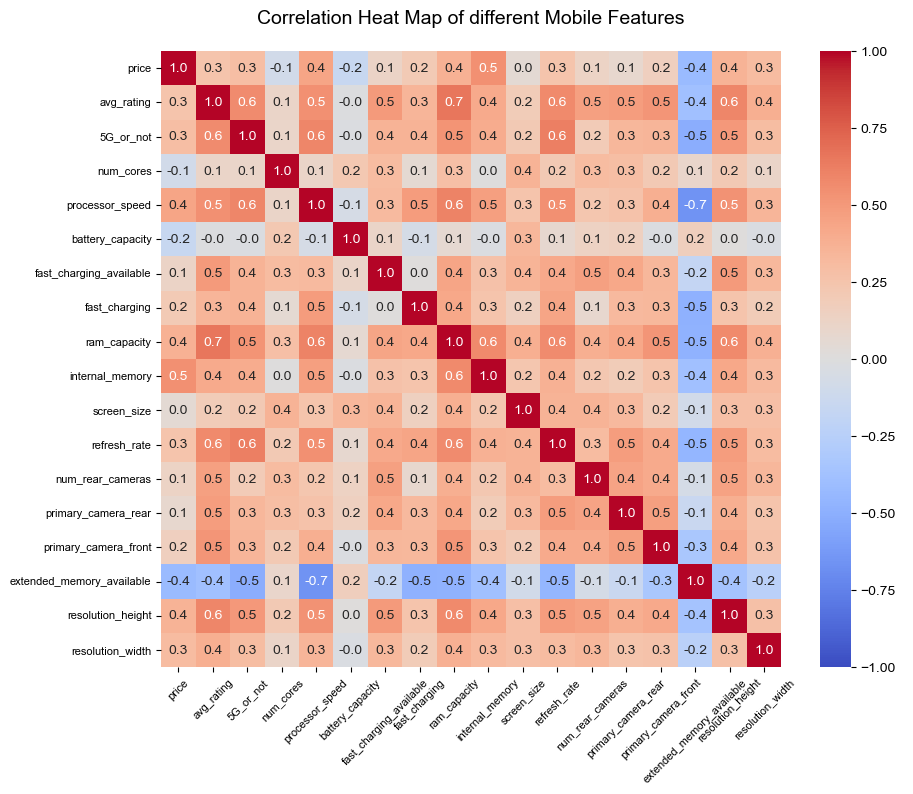

In [19]:
# Filter numerical columns
numeric_cols = df.select_dtypes(include = ["int64", "float64"])

# Calculate the correlation matrix for numerical columns
corr_matrix = numeric_cols.corr()

# Set up the matplotlib figure
plt.figure(figsize = (10, 8), facecolor = "white")

# Plot the heatmap
sns.heatmap(corr_matrix, annot = True, cmap = "coolwarm", fmt = ".1f", vmin = -1, vmax = 1)
sns.set(font_scale = 0.7)

# Add title
plt.title("Correlation Heat Map of different Mobile Features", pad = 20, fontsize = 14)
plt.xticks(fontsize = 8, rotation = 45)
plt.yticks(fontsize = 8)

# Show plot
plt.show()

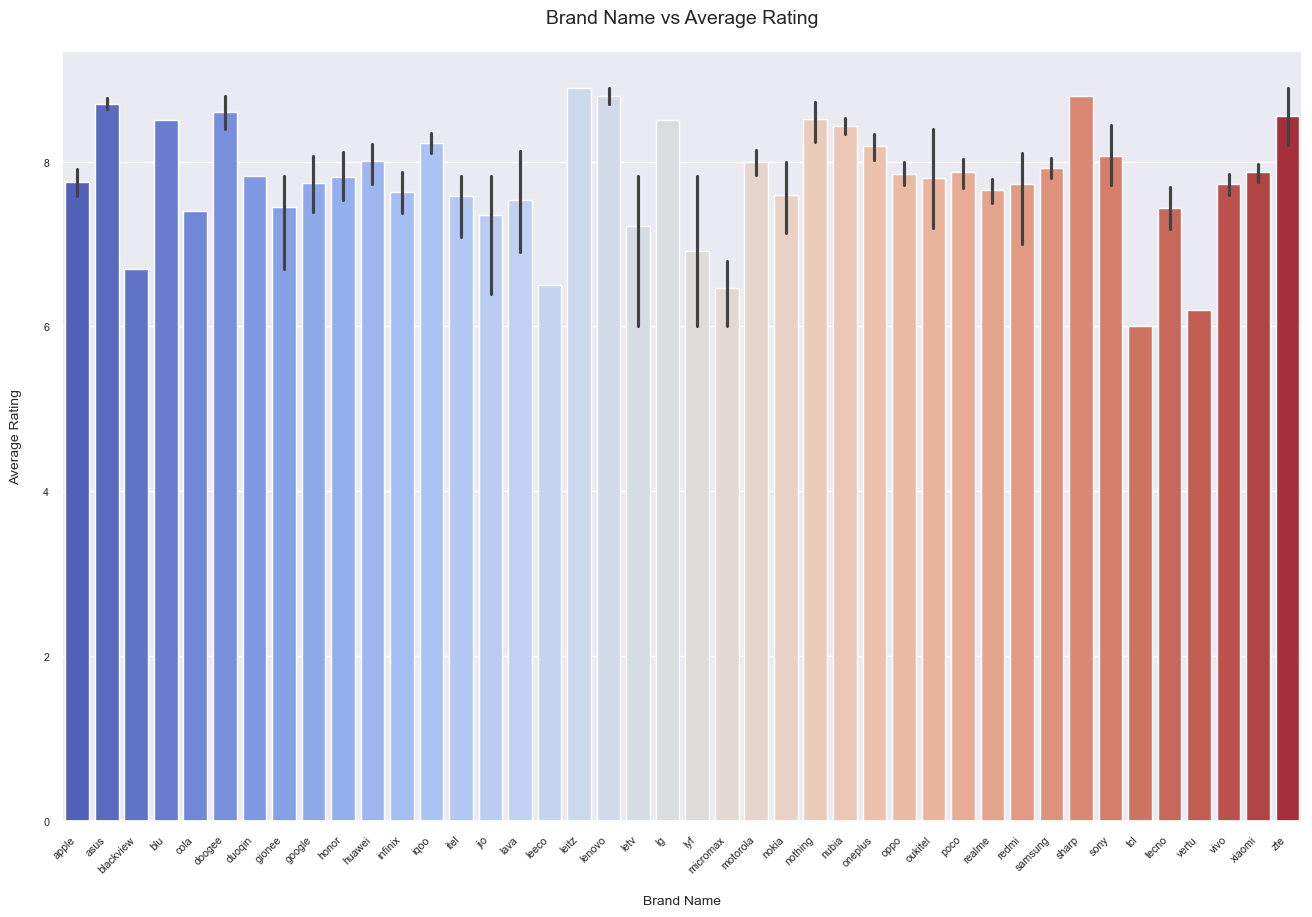

In [20]:
sorted_df = df.sort_values(by = "brand_name", ascending = True)

plt.figure(figsize = (16, 10), facecolor = "white")
sns.barplot(data = sorted_df, x = "brand_name", y = "avg_rating", palette = "coolwarm")
plt.xticks(rotation = 45, ha = "right")
plt.xlabel("Brand Name", labelpad = 15, fontsize = 10)
plt.ylabel("Average Rating", labelpad = 15, fontsize = 10)
plt.title("Brand Name vs Average Rating", pad = 20, fontsize = 14)
plt.show()

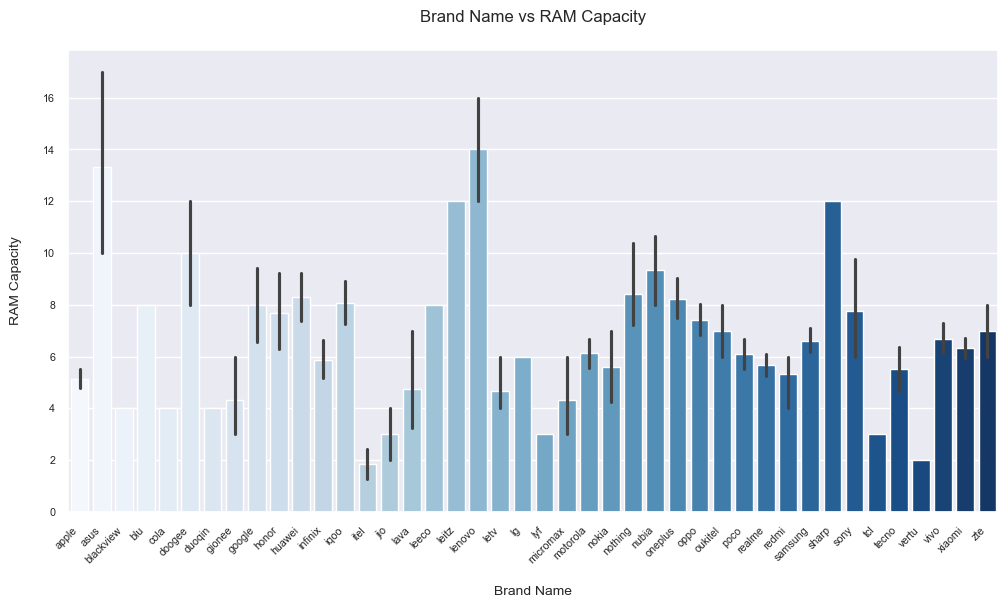

In [21]:
plt.figure(figsize = (12, 6), facecolor = "white")
sns.barplot(data = df, x = "brand_name", y = "ram_capacity", palette = "Blues")
plt.xlabel("Brand Name", labelpad = 15, fontsize = 10)
plt.ylabel("RAM Capacity", labelpad = 15, fontsize = 10)
plt.title("Brand Name vs RAM Capacity", pad = 20, fontsize = 12)
plt.xticks(rotation = 45, ha = "right")
plt.show()

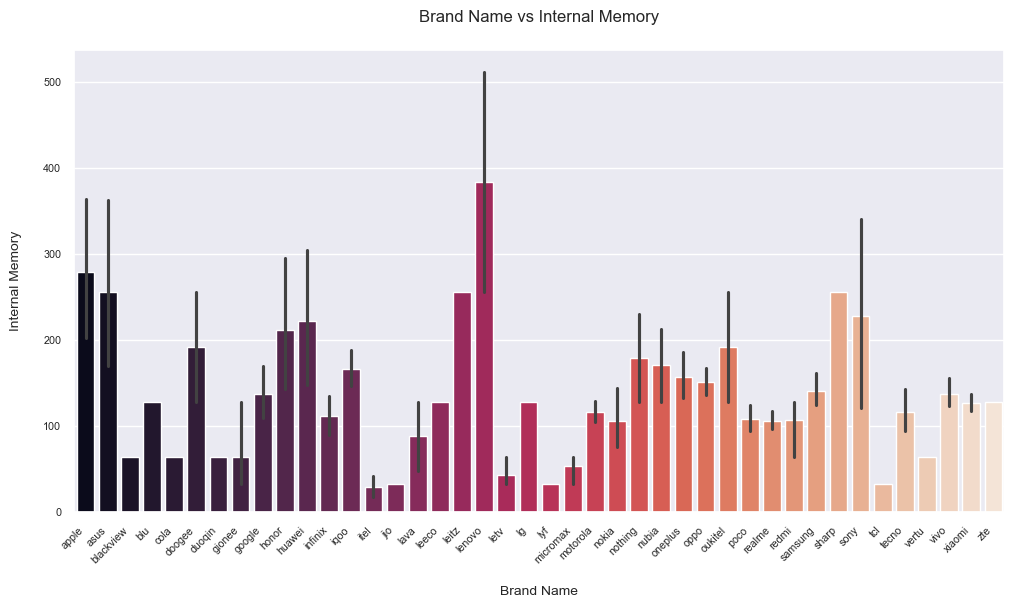

In [22]:
plt.figure(figsize = (12, 6), facecolor = "white")
sns.barplot(data = df, x = "brand_name", y = "internal_memory", palette = "rocket")
plt.xlabel("Brand Name", labelpad = 15, fontsize = 10)
plt.ylabel("Internal Memory", labelpad = 15, fontsize = 10)
plt.title("Brand Name vs Internal Memory", pad = 20, fontsize = 12)
plt.xticks(rotation = 45, ha = "right")
plt.show()